###Training Gausian Naive Bayes model and calculating the accuracy and the confusion matrix to assess the classifier's performance

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('Data-NB.xlsx')

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Attendance'] = label_encoder.fit_transform(data['Attendance'])
data['Grade'] = label_encoder.fit_transform(data['Grade'])

X = data.drop('Grade', axis=1)
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.67
Confusion Matrix:
[[ 8  0  0  0  0  0  0]
 [ 1  5  3  0  1  0  0]
 [ 0  0 10  2  1  0  0]
 [ 0  0  6 20  2  0  0]
 [ 0  0  0 11  3  0  0]
 [ 0  0  0  1  3 18  1]
 [ 0  0  0  0  0  1  3]]


###Visualization of the correlation matrix to check and verify the assumptions of Naive Bayes algorithm

####Data-NB

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

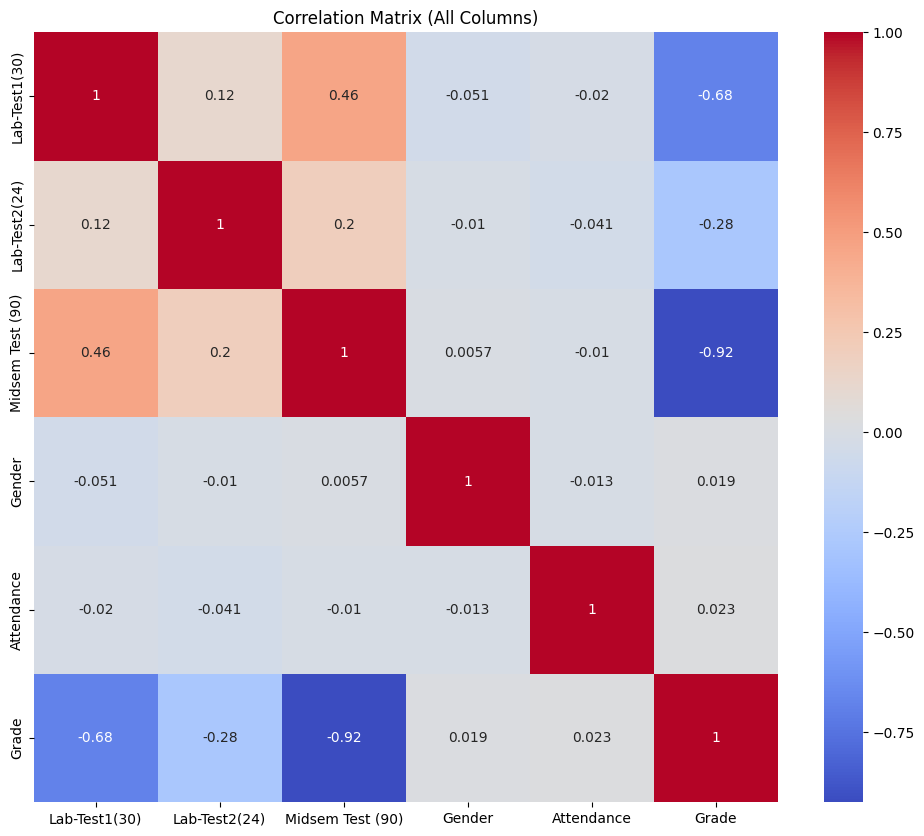

In [ ]:
data = pd.read_excel('Data-NB.xlsx')

numerical_cols = ['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)']
categorical_cols = ['Gender', 'Attendance', 'Grade']

for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

all_cols = numerical_cols + categorical_cols

corr = data[all_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (All Columns)')
plt.show()

####IRIS dataset

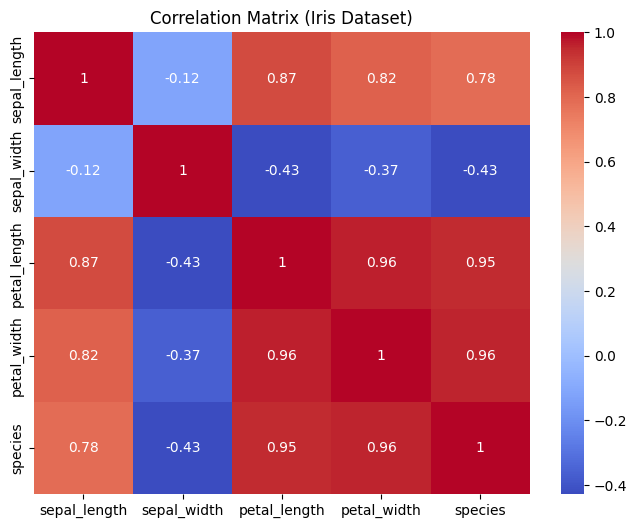

In [ ]:
iris = sns.load_dataset("iris")
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
categorical_cols = ['species']

encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])

all_cols = numerical_cols + categorical_cols
corr = iris[all_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Iris Dataset)')
plt.show()

###Classification report of the IRIS dataset

Classification Report:
                 precision  recall  f1-score  support
Iris-setosa            1.0     1.0       1.0     10.0
Iris-versicolor        1.0     1.0       1.0      9.0
Iris-virginica         1.0     1.0       1.0     11.0
accuracy               1.0     1.0       1.0      1.0
macro avg              1.0     1.0       1.0     30.0
weighted avg           1.0     1.0       1.0     30.0

Macro Average:
precision     1.0
recall        1.0
f1-score      1.0
support      30.0
Name: macro avg, dtype: float64

Weighted Average:
precision     1.0
recall        1.0
f1-score      1.0
support      30.0
Name: weighted avg, dtype: float64


<Figure size 800x600 with 0 Axes>

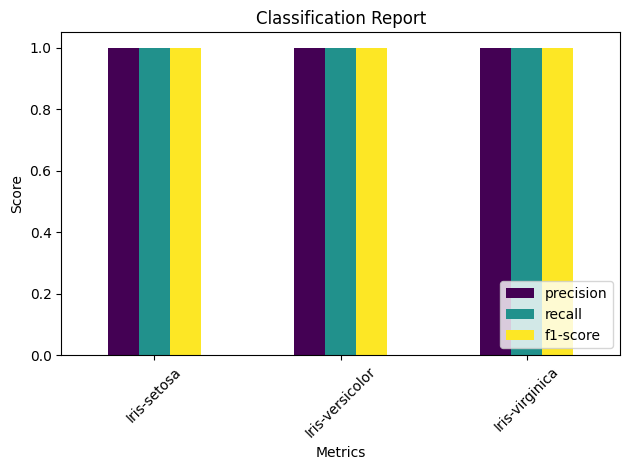

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv("iris.csv")

# Split the dataset into features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = gnb.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()

# Calculate macro and weighted averages
macro_avg = report_df.loc['macro avg', ['precision', 'recall', 'f1-score', 'support']]
weighted_avg = report_df.loc['weighted avg', ['precision', 'recall', 'f1-score', 'support']]

# Print the classification report
print("Classification Report:")
print(report_df)

# Print macro and weighted averages
print("\nMacro Average:")
print(macro_avg)
print("\nWeighted Average:")
print(weighted_avg)

# Plot the classification report
plt.figure(figsize=(8, 6))
report_df.iloc[:-3, :-1].plot(kind='bar', cmap='viridis')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


###Comparision of the performances of Naive Bayes Classifier with that of Random Forest and Gradient Boosted Decision Trees

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and Preprocess the Data
data = pd.read_excel("Data-NB.xlsx")

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Attendance'] = label_encoder.fit_transform(data['Attendance'])

# Split features and target variable
X = data.drop('Grade', axis=1)
y = data['Grade']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Classifiers
# Naïve Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Gradient Boosted Trees
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# Step 4: Evaluate Performance
# Naïve Bayes
naive_bayes_predictions = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
naive_bayes_precision = precision_score(y_test, naive_bayes_predictions, average='weighted')
naive_bayes_recall = recall_score(y_test, naive_bayes_predictions, average='weighted')
naive_bayes_f1 = f1_score(y_test, naive_bayes_predictions, average='weighted')
naive_bayes_log_loss = log_loss(y_test, naive_bayes.predict_proba(X_test), labels=naive_bayes.classes_)

# Random Forest
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='weighted')
random_forest_log_loss = log_loss(y_test, random_forest.predict_proba(X_test), labels=random_forest.classes_)

# Gradient Boosted Trees
gradient_boosting_predictions = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
gradient_boosting_precision = precision_score(y_test, gradient_boosting_predictions, average='weighted')
gradient_boosting_recall = recall_score(y_test, gradient_boosting_predictions, average='weighted')
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_predictions, average='weighted')
gradient_boosting_log_loss = log_loss(y_test, gradient_boosting.predict_proba(X_test), labels=gradient_boosting.classes_)

# Step 5: Compare Results
print("Naïve Bayes - Accuracy:", naive_bayes_accuracy)
print("Naïve Bayes - Precision:", naive_bayes_precision)
print("Naïve Bayes - Recall:", naive_bayes_recall)
print("Naïve Bayes - F1 Score:", naive_bayes_f1)
print("Naïve Bayes - Log Loss:", naive_bayes_log_loss)

print("\nRandom Forest - Accuracy:", random_forest_accuracy)
print("Random Forest - Precision:", random_forest_precision)
print("Random Forest - Recall:", random_forest_recall)
print("Random Forest - F1 Score:", random_forest_f1)
print("Random Forest - Log Loss:", random_forest_log_loss)

print("\nGradient Boosted Trees - Accuracy:", gradient_boosting_accuracy)
print("Gradient Boosted Trees - Precision:", gradient_boosting_precision)
print("Gradient Boosted Trees - Recall:", gradient_boosting_recall)
print("Gradient Boosted Trees - F1 Score:", gradient_boosting_f1)
print("Gradient Boosted Trees - Log Loss:", gradient_boosting_log_loss)


Naïve Bayes - Accuracy: 0.67
Naïve Bayes - Precision: 0.6941327829377364
Naïve Bayes - Recall: 0.67
Naïve Bayes - F1 Score: 0.6659988027469051
Naïve Bayes - Log Loss: 1.408804379342543

Random Forest - Accuracy: 0.83
Random Forest - Precision: 0.8387717569786534
Random Forest - Recall: 0.83
Random Forest - F1 Score: 0.8318015650411295
Random Forest - Log Loss: 0.4424294122067732

Gradient Boosted Trees - Accuracy: 0.86
Gradient Boosted Trees - Precision: 0.8726010101010101
Gradient Boosted Trees - Recall: 0.86
Gradient Boosted Trees - F1 Score: 0.86211990876507
Gradient Boosted Trees - Log Loss: 0.5080643801258826


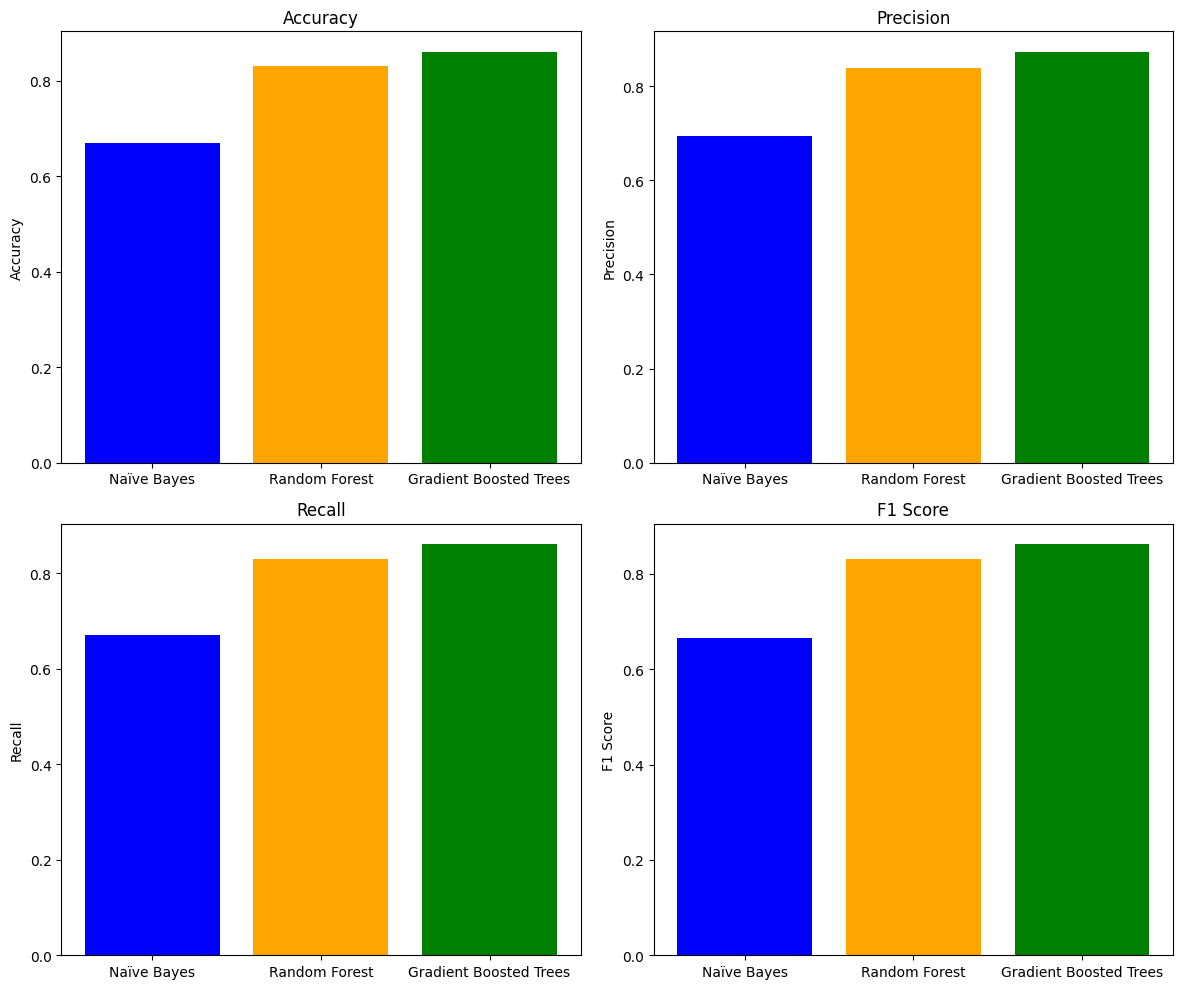

In [ ]:
import matplotlib.pyplot as plt

# Define the classifiers and their corresponding metrics
classifiers = ['Naïve Bayes', 'Random Forest', 'Gradient Boosted Trees']
accuracies = [naive_bayes_accuracy, random_forest_accuracy, gradient_boosting_accuracy]
precisions = [naive_bayes_precision, random_forest_precision, gradient_boosting_precision]
recalls = [naive_bayes_recall, random_forest_recall, gradient_boosting_recall]
f1_scores = [naive_bayes_f1, random_forest_f1, gradient_boosting_f1]
log_losses = [naive_bayes_log_loss, random_forest_log_loss, gradient_boosting_log_loss]

# Plotting metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(classifiers, accuracies, color=['blue', 'orange', 'green'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Accuracy')

# Precision
axs[0, 1].bar(classifiers, precisions, color=['blue', 'orange', 'green'])
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylabel('Precision')

# Recall
axs[1, 0].bar(classifiers, recalls, color=['blue', 'orange', 'green'])
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Recall')

# F1-score
axs[1, 1].bar(classifiers, f1_scores, color=['blue', 'orange', 'green'])
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


###Analysis of the reasons behind any observed differences in their performances

In [ ]:
# 1. Overall, the Gradient Boosted Trees classifier outperforms Naïve Bayes and Random Forest in terms of accuracy, precision, recall, F1 score, and log loss.
#    It provides the best balance between capturing positive instances and avoiding false positives, resulting in higher overall performance on the given dataset.

# 2. Model Complexity:

#     Naïve Bayes: It is a simple probabilistic classifier based on Bayes' theorem with strong independence assumptions between features. It assumes that features
#                  are conditionally independent given the class label.

#     Random Forest: It is an ensemble learning method based on decision trees. Random Forest builds multiple decision trees and combines their predictions through
#                    voting or averaging, reducing the variance of individual trees.

#     Gradient Boosted Trees: It is also an ensemble learning method, but it builds decision trees sequentially, with each subsequent tree correcting the errors made
#                             by the previous ones. Gradient Boosted Trees typically produce more complex models compared to Random Forest.

# 3. Handling of Features:

#     Naïve Bayes: It assumes feature independence, which may not hold true in all datasets. If the features are not truly independent given the class label, Naïve Bayes
#                 may underperform.

#     Random Forest: It can handle both numerical and categorical features naturally without requiring feature scaling. It also handles feature interactions well due to
#                   the nature of decision trees.

#     Gradient Boosted Trees: Similar to Random Forest, it can handle both numerical and categorical features effectively. However, it may require more careful
#                             hyperparameter tuning compared to Random Forest.

# 4. Handling Imbalanced Data:

#     Naïve Bayes: It can struggle with imbalanced datasets, as it makes strong assumptions about the distribution of features in each class.

#     Random Forest: It can handle imbalanced datasets well due to its ensemble nature and the ability to weight classes.

#     Gradient Boosted Trees: It can also handle imbalanced datasets effectively by adjusting class weights or using techniques like gradient boosting with resampling.

# 5. Hyperparameter Sensitivity:

#     Naïve Bayes: It has few hyperparameters to tune, making it less sensitive to hyperparameter choices.

#     Random Forest: It has several hyperparameters to tune, such as the number of trees, tree depth, and minimum samples per leaf, which can significantly impact
#                    performance.

#     Gradient Boosted Trees: It is highly sensitive to hyperparameters such as learning rate, tree depth, and number of boosting iterations. Proper tuning is
#                             crucial for optimal performance.

# 6. Data Size:

#     Naïve Bayes: It tends to perform well on small to medium-sized datasets due to its simplicity and low computational cost.

#     Random Forest and Gradient Boosted Trees: They can handle large datasets efficiently, but they may require more computational resources and longer training
#                                               times, especially as the dataset size increases.

# In summary, the differences in performance among the classifiers can be attributed to their underlying algorithms, handling of features, sensitivity to
# hyperparameters, ability to handle imbalanced data, and scalability to different dataset sizes. Depending on the specific characteristics of the dataset and
# the problem at hand, one algorithm may outperform the others. It's essential to experiment with different algorithms and carefully tune their parameters to
# achieve the best results for a given task.
